# Кремлев Антон Алексеевич 

# Группа 18ивт2

# Вариант 1

### 1. Какое количество мужчин и женщин ехало на корабле? 

In [121]:
import re
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
%matplotlib inline

In [10]:
titanic_file = pd.read_csv('titanic.csv')
print("Female on ship:", len(titanic_file.loc[titanic_file.Sex == "female"]))

Female on ship: 314


In [10]:
print("Male on ship:", len(titanic_file.loc[titanic_file.Sex == "male"]))

Male on ship: 577


### 2.Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [60]:
(titanic_file[titanic_file.Survived==1].shape[0])/(titanic_file.shape[0])

0.3838383838383838

### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [12]:
print('1class: ',titanic_file[titanic_file.Pclass == 1].shape[0])

1class:  216


In [55]:
titanic_file[titanic_file.Pclass == 1].shape[0]/(titanic_file.shape[0])

0.24242424242424243

### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [23]:

print('Average: ', np.average(titanic_file[titanic_file.Age.notnull()].Age),
    '\nAge median:', titanic_file[titanic_file.Age.notnull()].Age.median())

Average:  29.69911764705882 
Age median: 28.0


### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [27]:
titanic_file[["SibSp", "Parch"]].corr()


,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


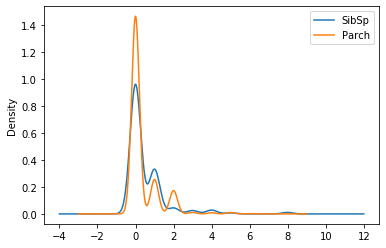

In [26]:
titanic_file[["SibSp", "Parch"]].plot.kde()

### 6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские

In [34]:
titanic_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [125]:

titanic_fil1 = pd.read_csv('titanic.csv',index_col = 'PassengerId')
titanic_fil1['Pclass'] = titanic_fil1['Pclass'].astype(object)
a =titanic_fil1[titanic_fil1['Sex'] == 'female']['Name'].map(cleaner)
print(a.value_counts())

print((titanic_file.loc[titanic_file.Name == names[names.value_counts().max()]]).shape)
#names = titanic_file.loc[titanic_file.Sex == "female"]["Name"]
#print(names.count())#
#print(names[names.value_counts().max()])
#print(len(titanic_file.loc[titanic_file.Name == names[names.value_counts().max()]]))
#print((titanic_file.loc[titanic_file.Name == names[names.value_counts().max()]]).shape)
#for i in range(titanic_file.shape[0]):
#    if titanic_file.Name == names[names.value_counts().max()]:
#        print(names[names.value_counts().max()])
#print((titanic_file.Name[names.value_counts().max()]))
def cleaner(name1):
    #Before , 2name
    s= re.search('^[^,]+,(.*)',name1)
    if s:
        name1= s.group(1)
    s = re.search('\(([^)]+)\)',name1)
    #1Name in Brackets
    if s:
        name1= s.group(1) 
    #Delete Mrs....
    name1= re.sub('(Miss\. |Mrs\. |Ms\.)',' ',name1)
     #Delete ""
    name1= name1.split(' ')[0].replace('"','')
    return name1



    

             185
Mary           6
Elizabeth      6
Anna           6
Ada            4
Margaret       4
Maria          4
Edith          3
Florence       3
Jane           3
Mrs            3
Catherine      3
Lily           2
Johanna        2
Marie          2
Emily          2
Charlotte      2
Alice          2
Martha         2
Elisabeth      2
Marion         2
Clara          2
Rosa           2
Augusta        1
Helen          1
Emelia         1
Hanne          1
Farnham        1
Grace          1
Imanita        1
            ... 
Amy            1
Cordelia       1
Emma           1
Selini         1
Helene         1
Rosalie        1
Lutie          1
Lilian         1
Miriam         1
Sallie         1
Elna           1
Tillie         1
Lucile         1
Bertha         1
Lucy           1
Ida            1
Juliette       1
Eliza          1
Leila          1
Agnes          1
Selma          1
Alfrida        1
Myna           1
Annie          1
Adele          1
Mantoura       1
Edwiga         1
Ethel         

### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [39]:
titanic_file[["Survived", "Pclass"]].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

Survived [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BBD24388>]]


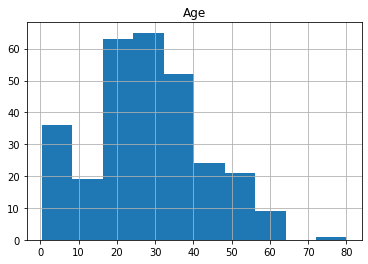

In [46]:
print('Survived',titanic_file[["Age"]].loc[titanic_file.Survived == True].hist())


!Survived [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD350F88>]]


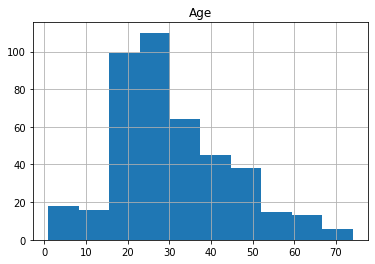

In [45]:
print('!Survived',titanic_file[["Age"]].loc[titanic_file.Survived == False].hist())

### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

1class: + [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD687188>]]


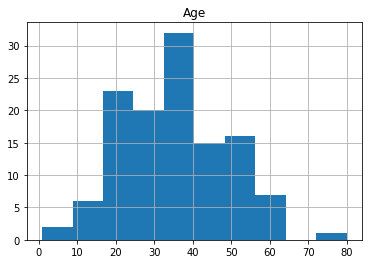

In [51]:
print('1class: +', titanic_file.query("Survived == True and Pclass == 1")[["Age",]].hist())


1class: - [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD7BEA88>]]
1class: [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD7E30C8>]]
1class: [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD839D08>]]
1class: [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD752488>]]
1class: [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BD8AFAC8>]]


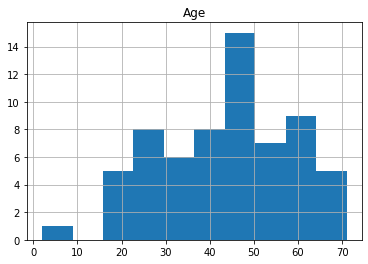

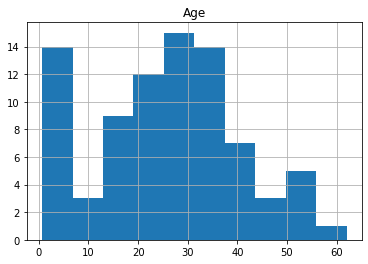

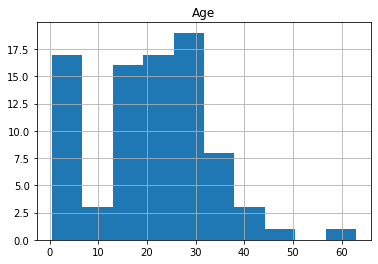

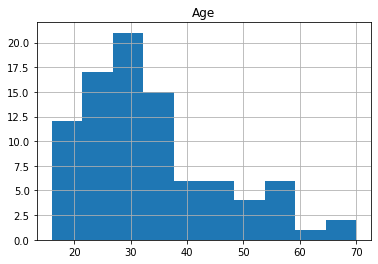

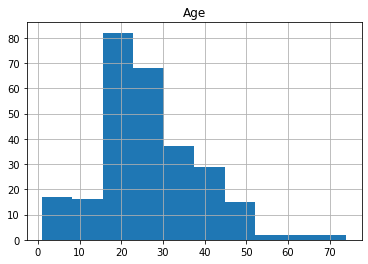

In [52]:
print('1class: -',titanic_file.query("Survived == False and Pclass == 1")[["Age",]].hist())


1class: + [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BDA3BCC8>]]
1class: - [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BDAAD9C8>]]


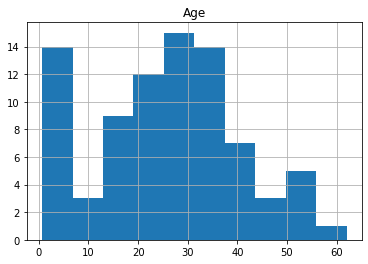

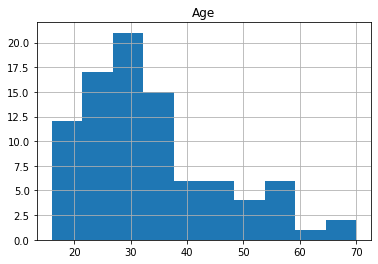

In [53]:
print('1class: +',titanic_file.query("Survived == True and Pclass == 2")[["Age",]].hist())
print('1class: -',titanic_file.query("Survived == False and Pclass == 2")[["Age",]].hist())


1class: + [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BDAC8D88>]]
1class: - [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BDB97D08>]]


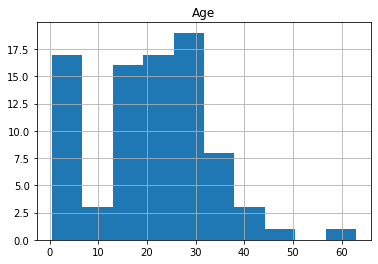

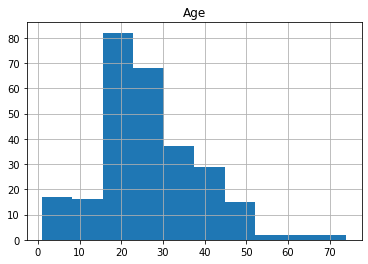

In [54]:
print('1class: +',titanic_file.query("Survived == True and Pclass == 3")[["Age",]].hist())
print('1class: -',titanic_file.query("Survived == False and Pclass == 3")[["Age",]].hist())

###  10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

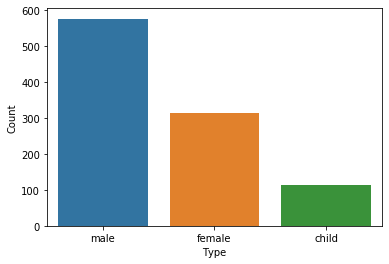

In [64]:
frame = pd.DataFrame({'Type':["male", "female", "child"],
                      'Count': [len(titanic_file.loc[titanic_file.Sex == "male"]),
                                len(titanic_file.loc[titanic_file.Sex == "female"]),
                                len(titanic_file.query( "Age < 18" ))]})
sns.barplot(data = frame, y = 'Count', x = 'Type')

### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

In [ ]:

kol = []
kol.append(int(titanic_file[titanic_file.Age<18].count()['Sex']))
kol.append(int(titanic_file[titanic_file.Age>18][titanic_file.Sex == 'male'].count()['Sex']))
kol.append(int(titanic_file[titanic_file.Age>18][titanic_file.Sex == 'female'].count()['Sex']))
rcParams['figure.figsize'] =15, 10
type_ = ['Дети','Женщины','Муждычины']
plt.bar(type_,kol)
plt.show()


In [ ]:
titanic_file